# Компьютерное зрение

Выполнил: Мишин Илья 381803-2

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from IPython.display import Image

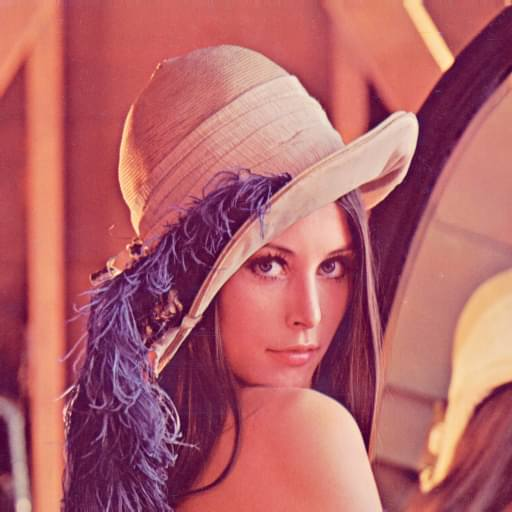

In [2]:
img_data = requests.get("https://bellard.org/bpg/lena30.jpg").content
with open('lena.jpg', 'wb') as handler:
    handler.write(img_data)
Image(img_data)

# Задание 1
Найти лицо на изображении

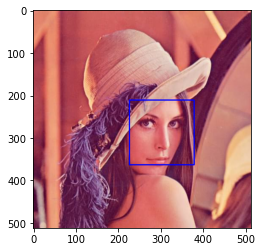

In [3]:
face_cascade = cv2.CascadeClassifier('D:\opencv\sources\data\haarcascades\haarcascade_frontalface_default.xml')
image = cv2.imread('lena.jpg')
image1 = cv2.imread('lena.jpg')
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags = cv2.CASCADE_SCALE_IMAGE)
for (x, y, w, h) in faces:
    x1 = int(x+w*0.05)
    y1 = int(y+h*0.05)
    x2 = int(x1+w*0.9)
    y2 = int(y1+h*0.9)
    cv2.rectangle(image1, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 2
Отступить на 10% от границ лица и получить фрагмент изображения

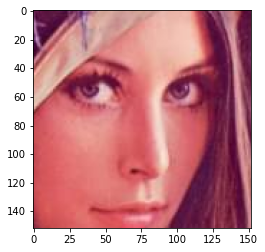

In [4]:
image2 = image[y1:y2, x1:x2] # уже есть отступ на 10%
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 3
Получить бинарное изображение краев (границ объекта)

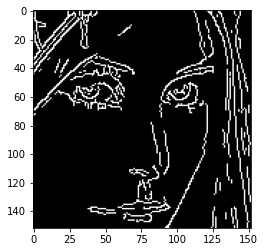

In [5]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # Чб изображение

image3 = cv2.Canny(gray, 100, 130)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 4
Удалить мелкие границы у которых длина и ширина меньше 10

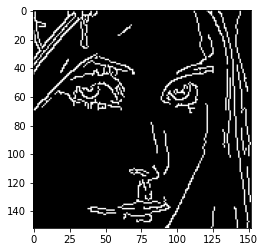

In [6]:
contours, thresh = cv2.findContours(image3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img_tmp = []
for i in range(len(contours)):
    min_rect = cv2.minAreaRect(contours[i])
    s_min_rect = min_rect[1][0]*min_rect[1][1]
    if s_min_rect >= 10:
        img_tmp.append(contours[i])
image4 = np.zeros(gray.shape, dtype='uint8')
cv2.drawContours(image4, img_tmp, -1, (255, 255, 255), 1) 

plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 5
Применить морфологическую операцию наращивания (размер 5х5)

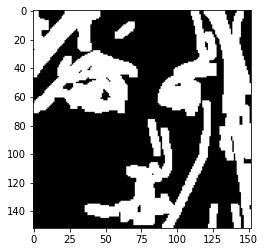

In [7]:
kernel = np.ones((5, 5), np.uint8)
image5 = image4
image5 = cv2.dilate(image5, kernel, iterations=1)

plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 6
Сгладить полученное изображение краев гауссовским фильтром 5 на 5. Получить нормализованное изображение M, где все пиксели от 0 до 1

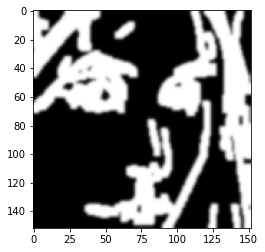

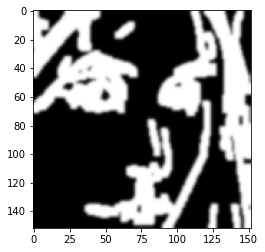

In [8]:
image6 = cv2.GaussianBlur(image5, (5, 5), 1)
plt.imshow(cv2.cvtColor(image6, cv2.COLOR_BGR2RGB))
plt.show()

M = cv2.normalize(image6, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

plt.imshow(cv2.cvtColor(M, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 7
Получить изображение F1 лица с примененной билатеральной фильтрацией

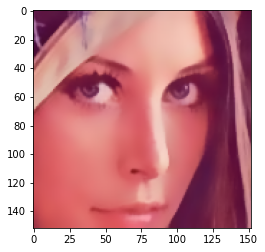

In [9]:
F1 = cv2.bilateralFilter(image2, 10, 55, 55)

plt.imshow(cv2.cvtColor(F1, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 8
Получить изображение F2 лица с улучшенной четкостью/контрастностью

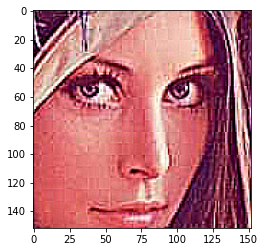

In [10]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
F2 = cv2.filter2D(image2, -1, kernel)

plt.imshow(cv2.cvtColor(F2, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 9
Осуществить финальную фильрацию по формуле

Result[x,y] = M[x,y]xF2[x,y]+(1-M[x,y])xF1[x,y]

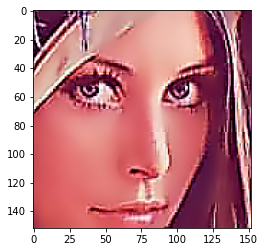

In [11]:
one = [1, 1, 1]
image9 = np.zeros(F1.shape, dtype='uint8' )
for i in range(M.shape[0]):
  for j in range(M.shape[1]):
    image9[i][j] = M[i][j]*F2[i][j] + (one - M[i][j])*F1[i][j]

plt.imshow(cv2.cvtColor(image9, cv2.COLOR_BGR2RGB))
plt.show()